In [13]:
# install the package ruptures
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import eia
#import changefinder
import ruptures as rpt
# standard libraies for python coding
import seaborn as sns 
sns.set(color_codes=True)
import statsmodels.api as sm

In [35]:
import pandas as pd
url = 'https://raw.githubusercontent.com/anfansler/IMSE641/main/MonthtoMonth.csv'
df1 = pd.read_csv(url)
df1.head()
# Dataset is now stored in a Pandas Dataframe

,Year,diff
0,1992,2.8
1,1992,1.4
2,1992,2.0
3,1992,0.7
4,1992,0.7


<Axes: xlabel='Year'>

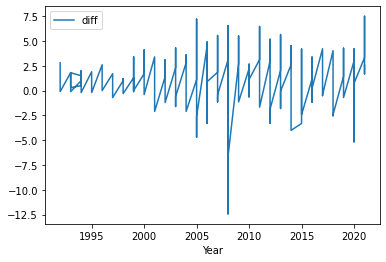

In [24]:
# visualize the time series
import matplotlib.pyplot as plt
df1.plot('Year', 'diff')

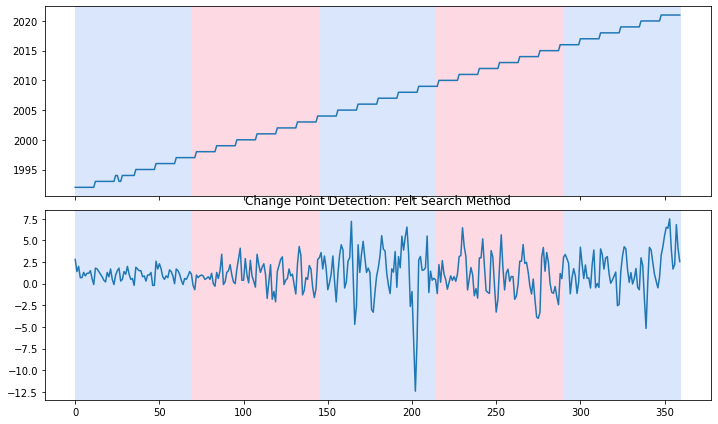

In [26]:
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(df1)
result = algo.predict(pen=10)
rpt.display(df1, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

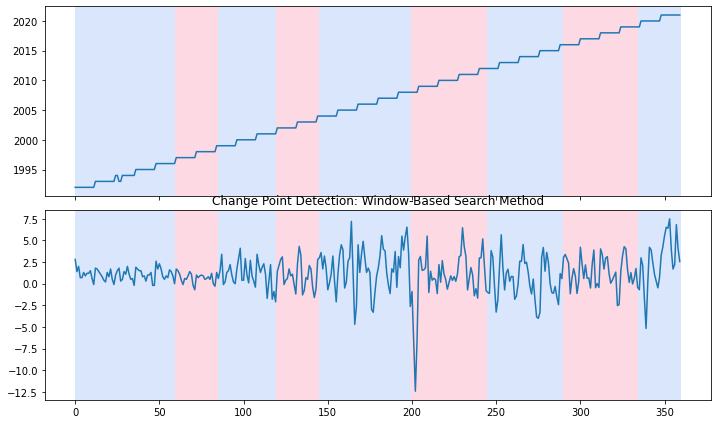

In [27]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(df1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(df1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

In [36]:
url = 'https://raw.githubusercontent.com/anfansler/IMSE641/main/MonthtoMonthCPIDiff.csv'
df2 = pd.read_csv(url)
df2.head()

,diff
0,2.8
1,1.4
2,2.0
3,0.7
4,0.7


<Axes: ylabel='Count'>

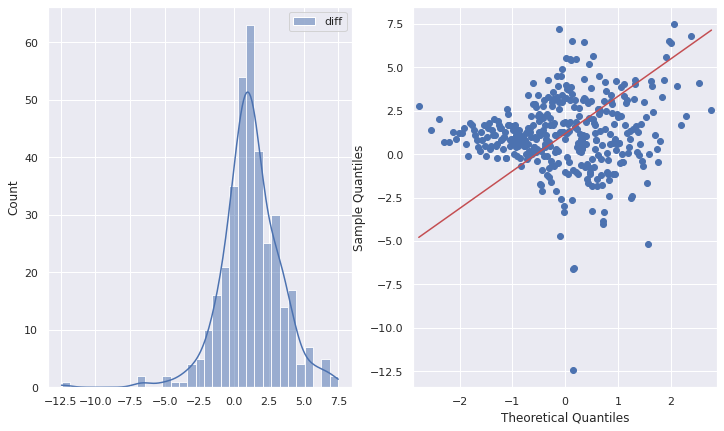

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12,7))
sm.ProbPlot(df2).qqplot(line='s',ax=ax[1]);
sns.histplot(df2,kde=True, color ='red',ax=ax[0])

<Axes: ylabel='Count'>

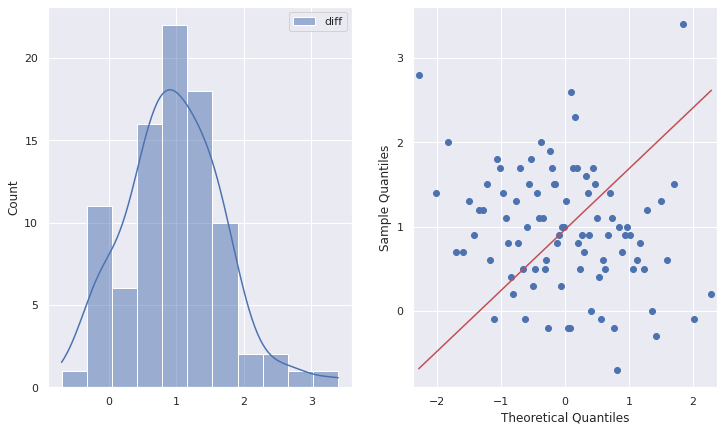

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12,7))
sm.ProbPlot(df2[0:90]).qqplot(line='s',ax=ax[1]);
sns.histplot(df2[0:90],kde=True, color ='red',ax=ax[0])

<Axes: >

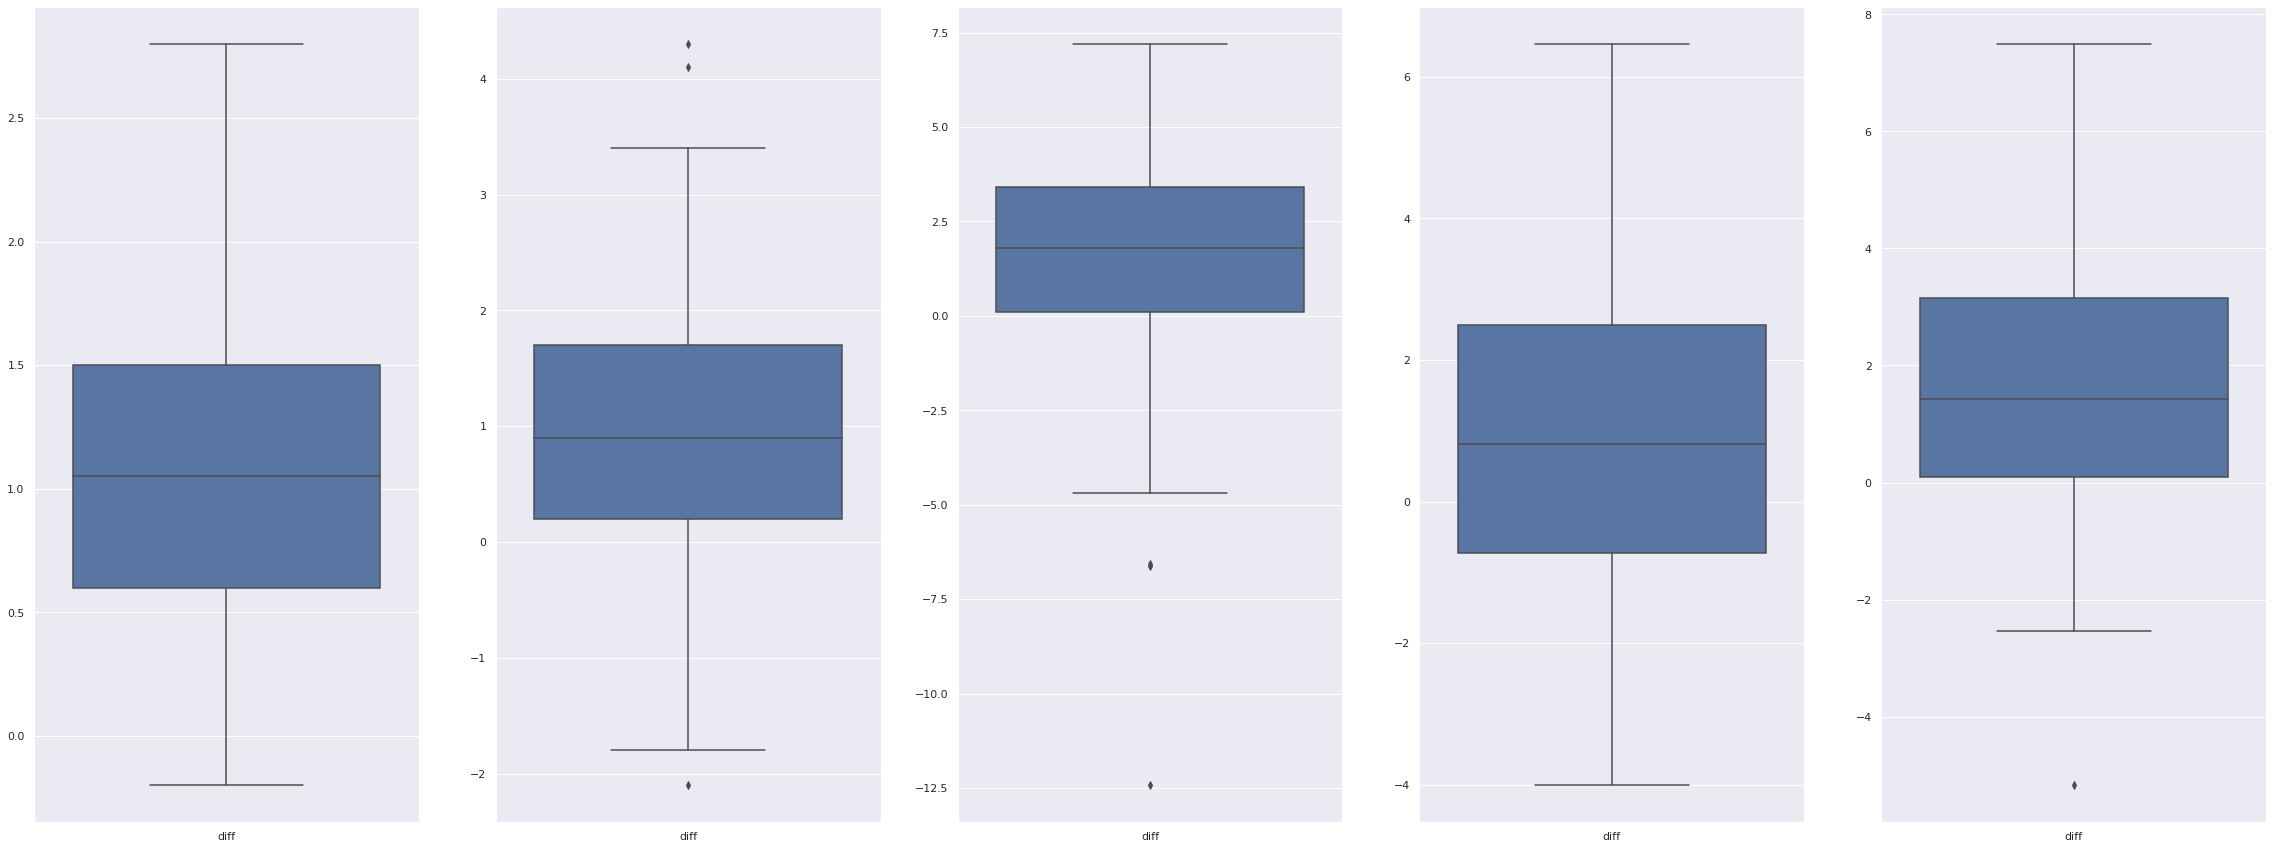

In [43]:
fig,axes = plt.subplots(ncols=5,figsize=(40,15))
sns.boxplot(data=df2[0:60],ax=axes[0])
sns.boxplot(data=df2[60:145],ax=axes[1])
sns.boxplot(data=df2[145:210],ax=axes[2])
sns.boxplot(data=df2[210:285],ax=axes[3])
sns.boxplot(data=df2[285:400],ax=axes[4])

<Axes: >

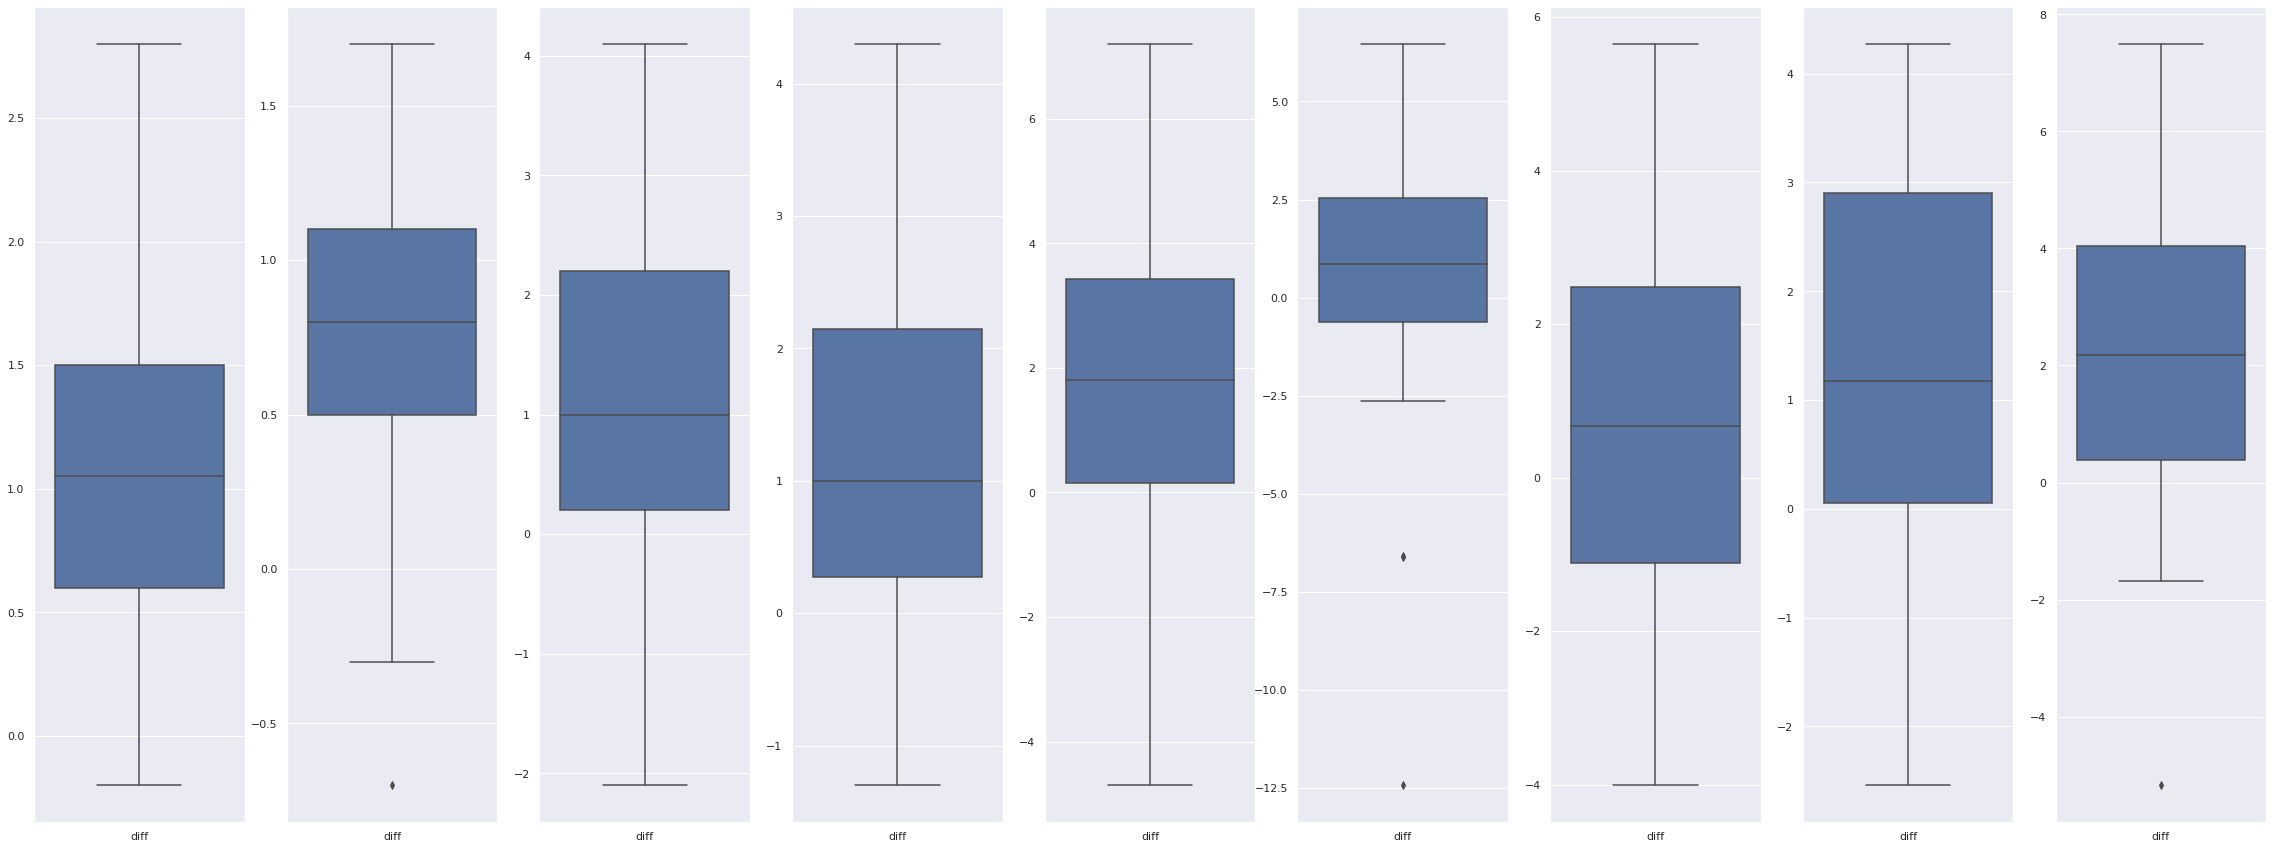

In [44]:
fig,axes = plt.subplots(ncols=9,figsize=(40,15))
sns.boxplot(data=df2[0:60],ax=axes[0])
sns.boxplot(data=df2[60:85],ax=axes[1])
sns.boxplot(data=df2[85:120],ax=axes[2])
sns.boxplot(data=df2[120:140],ax=axes[3])
sns.boxplot(data=df2[140:199],ax=axes[4])
sns.boxplot(data=df2[199:245],ax=axes[5])
sns.boxplot(data=df2[245:285],ax=axes[6])
sns.boxplot(data=df2[285:330],ax=axes[7])
sns.boxplot(data=df2[330:400],ax=axes[8])

<Axes: >

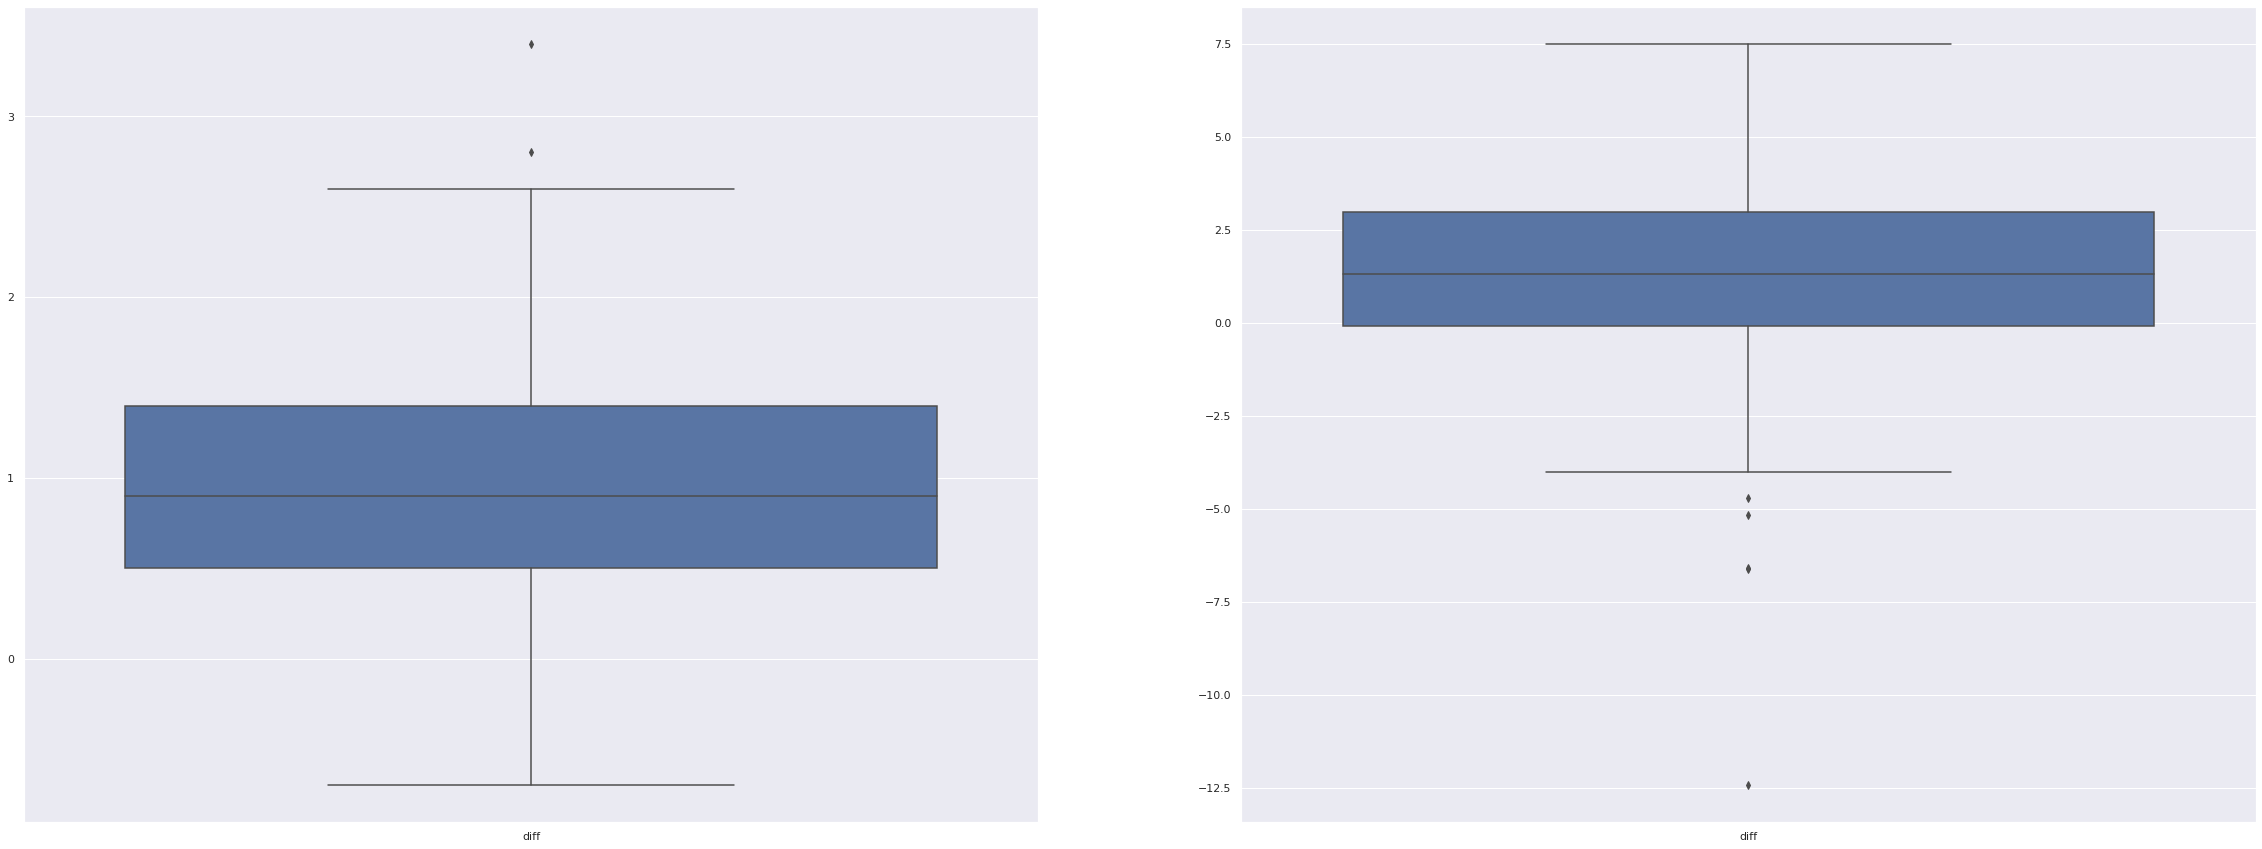

In [40]:
fig,axes = plt.subplots(ncols=2,figsize=(40,15))
sns.boxplot(data=df2[0:90],ax=axes[0])
sns.boxplot(data=df2[90:400],ax=axes[1])